# Loading data

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


import warnings
from pandas.core.common import SettingWithCopyWarning
from sklearn.metrics import mean_squared_error as MSE
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

data_train = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')
print(data_train.shape)
data_train.head(5).transpose()

(1108, 22)


,0,1,2,3,4
id,0,1,2,3,4
Year_Birth,1974,1962,1951,1974,1946
Education,Master,Graduation,Graduation,Basic,PhD
Marital_Status,Together,Single,Married,Married,Together
Income,46014.0,76624.0,75903.0,18393.0,64014.0
Kidhome,1,0,0,1,2
Teenhome,1,1,1,0,1
Dt_Customer,21-01-2013,24-05-2014,08-04-2013,29-03-2014,10-06-2014
Recency,21,68,50,2,56
NumDealsPurchases,10,1,2,2,7


## features

- id : Sample ID
- Year_Birth : Customer’s date of birth
- Education : Customer’s educational background
- Marital_status : Customer’s marital status
- Income : Customer’s annual household income
- Kidhome : Number of children in customer’s households
- Teenhome : Number of adolescents in customer’s households
- Dt_Customer : The datecustomer registered with the company
- Recency : Days after customer’s last purchase
- NumDealsPurchases : Discounted purchased frequency
- NumWebPurchases : The number of purchases on company’s website
- NumCatalogPurchases : The number of purchases usingcatalogs
- NumStorePuchases : The number of purchases made directly at the store
- NumWebVisitsMonth : The number of visits to websitelast month
- AcceptedCmp1: 1 if the customer accepted the offer in the 1stcampaign; 0 if not
- AcceptedCmp2: 1 if the customer accepted the offer in the 2ndcampaign; 0 if not
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rdcampaign; 0 if not
- AcceptedCmp4: 1 if the customer accepted the offer in the 4thcampaign; 0 if not
- AcceptedCmp5: 1 if the customer accepted the offer in the 5thcampaign; 0 if not
- Complain : 1 if the customer has complained in the last 2 years, 0 if not
- Response : 1 if the customer accepted the offer in the last campaign, 0 if not
- target : Total customer consumption (Target variables to predict)

### target overview

<AxesSubplot:xlabel='target', ylabel='Count'>

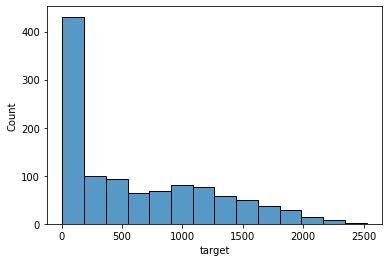

In [2]:
sns.histplot(data_train['target'])

In [3]:
data_train_T=data_train['target']
target=[]
for i in range(len(data_train_T)):
    if data_train_T.iloc[i] < 250:
        target.append(1)
    elif data_train_T.iloc[i] < 1000:
        target.append(2)
    elif data_train_T.iloc[i] < 1800:
        target.append(3)
    else:
        target.append(4)
        
data_train["Range"] = target

<AxesSubplot:xlabel='Range', ylabel='count'>

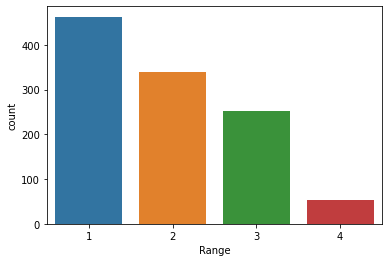

In [4]:
sns.countplot(x = data_train["Range"])

In [5]:
data_train[data_train['target']>2250].transpose()

,164,422,573,684,783,788
id,164,422,573,684,783,788
Year_Birth,1969,1977,1953,1947,1991,1949
Education,Graduation,2n Cycle,Graduation,Master,Master,PhD
Marital_Status,Together,Together,Together,Together,Single,Married
Income,76653.0,82326.0,94384.0,77632.0,90638.0,69098.0
Kidhome,0,0,0,0,0,0
Teenhome,0,0,0,0,0,0
Dt_Customer,16-08-2013,10-03-2014,04-03-2013,10-03-2013,13-02-2014,16-02-2013
Recency,91,30,62,73,29,82
NumDealsPurchases,1,1,0,1,1,1


In [6]:
print(data_train.shape, data_test.shape)

(1108, 23) (1108, 21)


In [7]:
data_train.describe()

,id,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Range
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,553.500000,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841,1.906137
std,319.996354,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972,0.910760
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,276.750000,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000,1.000000
50%,553.500000,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000,2.000000
75%,830.250000,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000,3.000000
max,1107.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,4.000000


# Preprocessing


### Calculating Age from Year_Birth

In [8]:
data_train['Age'] = 2022 - data_train['Year_Birth']
data_test['Age'] = 2022 - data_train['Year_Birth']

### Encoding from categitical data(Education, Marital_Status) to numerical data

In [9]:
data_train['Education'].value_counts()

Graduation    570
PhD           254
Master        173
2n Cycle       89
Basic          22
Name: Education, dtype: int64

label encoding -> education
- Basic, Graduation = 0
- 2n Cycle, Master = 1
- PhD = 2

In [10]:
for data in [data_train, data_test]:
    for i in range(data.shape[0]):
        education = data['Education'].iloc[i]
        if education in ["Basic", "Graduation"]:
            data['Education'].iloc[i] = 0
        elif education in ["2n Cycle", "Master"]:
            data['Education'].iloc[i] = 1
        else:
            data['Education'].iloc[i] = 2

---

In [11]:
data_train['Marital_Status'].value_counts()

Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

one hot encoding -> Marital Status

- Married, Together = 0 
- Single, Divorced, Widow, Alone, YOLO, Absurd = 1

In [12]:
for data in [data_train, data_test]:
    for i in range(data.shape[0]):
        marital_status = data['Marital_Status'].iloc[i]
        if marital_status in ["Married", "Together"]:
            data['Marital_Status'].iloc[i] = 0
        else:
            data['Marital_Status'].iloc[i] = 1

### Convert Dt_Customer to Sign_Month

In [13]:
for data in [data_train, data_test]:
    for i in range(data.shape[0]):
        data['Dt_Customer'].iloc[i] = int(data['Dt_Customer'].iloc[i][-1]) * 12 + int(data['Dt_Customer'].iloc[i][3:5])
        
recent_month = max(data_train['Dt_Customer'])

for data in [data_train, data_test]:
    month_arr = []
    for i in range(data.shape[0]):
        month_arr.append(recent_month - data['Dt_Customer'].iloc[i])
        
    data['Sign_Month'] = month_arr

### Correlation

In [14]:
corr_matrix = data_train.corr()
corr_matrix["target"].sort_values(ascending=False)

target                 1.000000
Range                  0.954404
NumCatalogPurchases    0.798065
Income                 0.784084
NumStorePurchases      0.677785
NumWebPurchases        0.546082
AcceptedCmp5           0.458208
AcceptedCmp1           0.361102
AcceptedCmp4           0.256784
Response               0.242760
Sign_Month             0.176342
Age                    0.136035
AcceptedCmp2           0.129995
Recency                0.050873
AcceptedCmp3           0.040736
id                     0.034192
Complain              -0.058704
NumDealsPurchases     -0.072802
Teenhome              -0.109214
Year_Birth            -0.136035
NumWebVisitsMonth     -0.488252
Kidhome               -0.538365
Name: target, dtype: float64

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='count'>

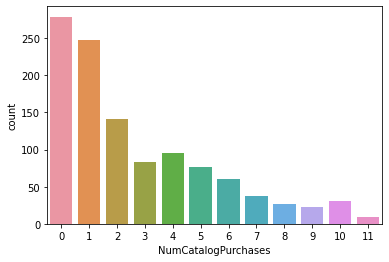

In [14]:
sns.countplot(x = data_train["NumCatalogPurchases"])

<AxesSubplot:xlabel='Income', ylabel='Count'>

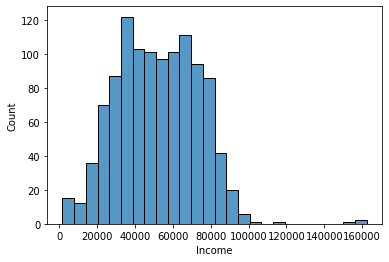

In [15]:
sns.histplot(x = data_train["Income"])

<AxesSubplot:xlabel='NumStorePurchases', ylabel='count'>

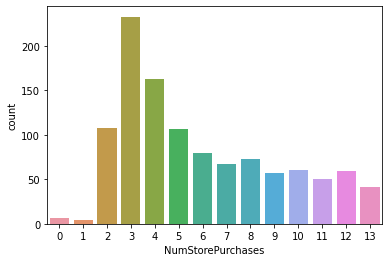

In [16]:
sns.countplot(x = data_train["NumStorePurchases"])

<AxesSubplot:xlabel='NumWebPurchases', ylabel='count'>

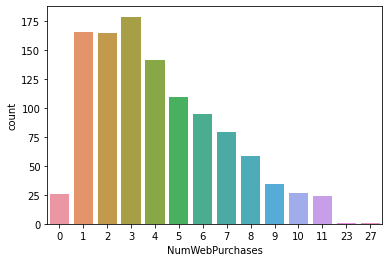

In [17]:
sns.countplot(x = data_train["NumWebPurchases"])

### Choosing features

In [15]:
data_train = data_train.drop(["id", "AcceptedCmp3"], axis = 1)
data_test = data_test.drop(["id", "AcceptedCmp3"], axis = 1)

### Dividing data (Target & Others)

In [16]:
data_train_X = data_train.drop(["target"], axis = 1)
data_train_Y = data_train["target"]

# Modeling & Data training


In [17]:
# Performance measure RMSE
def RMSE(true, pred):
    score = np.sqrt(MSE(true, pred))
    return score

### modeling & data training with 10 k-fold soft-voting


In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm


skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True) # 10 fold
n = 0

fold_target_pred = []
fold_score = []

for train_index, valid_index in skf.split(data_train_X, data_train_X['Range']): #stratified k fold
    n += 1
    
    val_pred_name = [] #validation pred model
    val_pred = []      #validation set pred
    target_pred = []   #test set pred
    
    train_X = np.array(data_train_X.drop("Range", axis = 1)) #deleting Range feature
    train_Y = np.array(data_train_Y)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(data_test)

    ### Create Model ###
    
    ### LGBMRegressor ###
    model = LGBMRegressor(random_state = 42, verbose = 0)
    model.fit(X_train, y_train)
    
    val_pred_name.append("LGBMRegressor")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))
    
    ### XGBRegressor ###
    model = XGBRegressor(random_state = 42)
    model.fit(X_train, y_train)
    
    val_pred_name.append("XGBRegressor")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))
    
    ### CatBoostRegressor ###
    model = CatBoostRegressor(random_state = 42)
    model.fit(X_train, y_train)
    
    val_pred_name.append("CatBoostRegressor")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))

    ### LinearRegression ###
    model = LinearRegression()
    model.fit(X_train, y_train)

    val_pred_name.append("LiearRegressor")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))

    ## LassoRegressor ###
    lasso = Lasso()
    lasso.fit(X_train, y_train)
    
    val_pred_name.append("LassoRegressor")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))

    ### Ridgeregressor ###
    ridge = Ridge()
    ridge.fit(X_train, y_train)

    val_pred_name.append("RidgeRegressor")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))

    ### DecisionTreeRegressor ###
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    val_pred_name.append("DecisionTreeRegressor")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))

    ### RandomForestRegressor ###
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    val_pred_name.append("RandomForestRegressor")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))

    ### SVM ### 
    model = svm.SVC()
    model.fit(X_train, y_train)

    val_pred_name.append("SVM")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))

    ### voting ###
    
    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    
    preds = preds/len(val_pred)
    
    ### average target pred ###
    target_preds = np.array(target_pred[0])
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    
    target_preds = target_preds/len(target_pred)
    
    fold_target_pred.append(target_preds) # append final target pred
    
    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model RMSE : %0.4f" %(val_pred_name[i], RMSE(y_valid, val_pred[i].astype(int))))
        
    print("==============================")
    print("Average RMSE %0.4f" %(RMSE(y_valid, preds.astype(int))))
    print("")
    
    fold_score.append(RMSE(y_valid, preds.astype(int)))

total_score = fold_score[0]
for i in range(2, len(fold_score), 1):
    total_score += fold_score[i]
total_score = total_score/(len(fold_score))    

print("==============================")
print("Total Average RMSE %0.4f" %(total_score)) #fianl average score

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Learning rate set to 0.040924
0:	learn: 585.9697945	total: 135ms	remaining: 2m 14s
1:	learn: 568.1983634	total: 136ms	remaining: 1m 8s
2:	learn: 551.3423866	total: 138ms	remaining: 45.8s
3:	learn: 534.8940526	total: 139ms	remaining: 34.7s
4:	learn: 519.9043071	total: 141ms	remaining: 28.1s
5:	learn: 505.3819607	total: 142ms	remaining: 23.6s
6:	learn: 491.7720538	total: 144ms	remaining: 20.4s
7:	learn: 477.7173969	total: 145ms	remaining: 18s
8:	learn: 465.4325687	total: 147ms	remaining: 16.1s
9:	learn: 454.2258446	total: 148ms	remaining: 14.6s
10:	learn: 443.1001458	total: 149ms	remaining: 13.4s
11:	learn: 431.8622570	total: 150ms	remaining: 12.3s
12:	learn: 420.7288914	total: 151ms	remaining: 11.5s
13:	learn: 409.8857332	total: 152ms	remaining: 10.7s
14:	learn:

# new input 

In [19]:
### average target pred ###
final_pred = np.array(fold_target_pred[0])
for i in range(1, len(fold_target_pred)):
    final_pred += fold_target_pred[i]

final_pred = final_pred/len(fold_target_pred)
final_pred = final_pred.astype(int)

In [20]:
submission = pd.read_csv("./sample_submission.csv")
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [21]:
submission['target'] = final_pred
submission

,id,target
0,0,573
1,1,795
2,2,760
3,3,1134
4,4,1274
...,...,...
1103,1103,32
1104,1104,-7
1105,1105,106
1106,1106,1018


In [22]:
submission.to_csv("./new.csv",index=False)